In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import warnings 
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

In [3]:
np.random.seed(2042)

In [4]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2,3)]
y = iris["target"]

In [5]:
cols = iris['feature_names'][2:4] + ['class']

In [6]:
dataset = np.c_[X, y]
df = pd.DataFrame(dataset, columns=cols)
df['class'] = df['class'].astype('int64')
df

,petal length (cm),petal width (cm),class
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


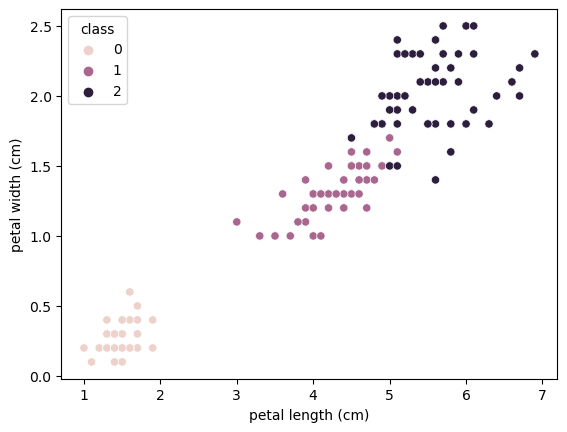

In [7]:
sns.scatterplot(df, x='petal length (cm)', y='petal width (cm)', hue='class')
plt.show()

In [8]:
X_with_bias = np.c_[np.ones([len(X), 1]), X]

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_with_bias, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [12]:
from sklearn.preprocessing import OneHotEncoder

def prepare_y(y):
    one_hot = OneHotEncoder()
    y_oh = y.copy().reshape(-1,1)
    y_oh = one_hot.fit_transform(y_oh)
    return y_oh.A

In [13]:
y_train_oh = prepare_y(y_train)
y_val_oh = prepare_y(y_val)
y_test_oh = prepare_y(y_test)

In [14]:
def softmax(S):
    exps = np.exp(S)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps/exp_sums

In [15]:
def cross_entropy(X, Y, Theta):
    return -(1/X.shape[0])*np.sum(np.diag(Y.T @ softmax(X @ Theta).T))

In [16]:
def grad_cross_entropy(X, Y, Theta):
    fact = 1/X.shape[0]
    logits = X @ Theta
    P = softmax(logits)
    error = P - Y
    grad = fact*(X.T @ error)
    return grad

In [49]:
def gradient_descent(X, y, eta, n_iterations, epsilon):
    Theta = np.random.randn(X.shape[1], y.shape[1])

    for iteration in range(n_iterations):
        gradients = grad_cross_entropy(X, y, Theta)
        if iteration % 500 == 0:
            loss = -np.mean(np.sum(y * np.log(softmax(X @ Theta) + epsilon), axis=1))
            print(iteration, loss)
        Theta = Theta - eta*gradients

    return Theta

In [52]:
Theta = gradient_descent(X_train, y_train_oh, 0.01, 500100, 1e-7)

0 1.0019358702305703
500 0.7146658443431705
1000 0.6128931171963751
1500 0.5467861282738986
2000 0.49997198842416096
2500 0.46457478754338544
3000 0.43651723299646666
3500 0.4135045349641476
4000 0.39414462061972194
4500 0.3775383429646865
5000 0.3630743692783212
5500 0.350319366099481
6000 0.33895557081791966
6500 0.32874339201314684
7000 0.3194979628933896
7500 0.3110738545145153
8000 0.30335476649185444
8500 0.29624636884092337
9000 0.2896712048861507
9500 0.28356498147599657
10000 0.2778738168523709
10500 0.27255216445300995
11000 0.26756122327574317
11500 0.2628677046537754
12000 0.2584428641975947
12500 0.2542617337854632
13000 0.2503025063793634
13500 0.24654603892178964
14000 0.24297544741292967
14500 0.23957577462944069
15000 0.23633371558408786
15500 0.23323738924886006
16000 0.23027614761970483
16500 0.2274404151286049
17000 0.22472155287669482
17500 0.22211174329004116
18000 0.21960389167352412
18500 0.21719154182044062
19000 0.21486880337184777
19500 0.212630289044298
2000

In [53]:
Theta

array([[ 15.67293913,   4.31740971, -21.1683696 ],
       [ -2.20286083,   0.43612048,   2.76194502],
       [ -6.19557381,   0.59627448,   9.0262745 ]])

In [57]:
logits = X_val.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_val)
accuracy_score

0.875

In [55]:
def plot_pred(Theta):
    x0, x1 = np.meshgrid(
            np.linspace(0, 8, 500).reshape(-1, 1),
            np.linspace(0, 2.7, 200).reshape(-1, 1),
        )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

    logits = X_new_with_bias.dot(Theta)
    Y_proba = softmax(logits)
    y_predict = np.argmax(Y_proba, axis=1)

    zz1 = Y_proba[:, 1].reshape(x0.shape)
    zz = y_predict.reshape(x0.shape)

    plt.figure(figsize=(10, 4))
    plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
    plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
    plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

    plt.contourf(x0, x1, zz, cmap=custom_cmap)
    contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
    plt.clabel(contour, inline=1, fontsize=12)
    plt.xlabel("Petal length", fontsize=14)
    plt.ylabel("Petal width", fontsize=14)
    plt.legend(loc="upper left", fontsize=14)
    plt.axis([0, 7, 0, 2.7])
    plt.show()

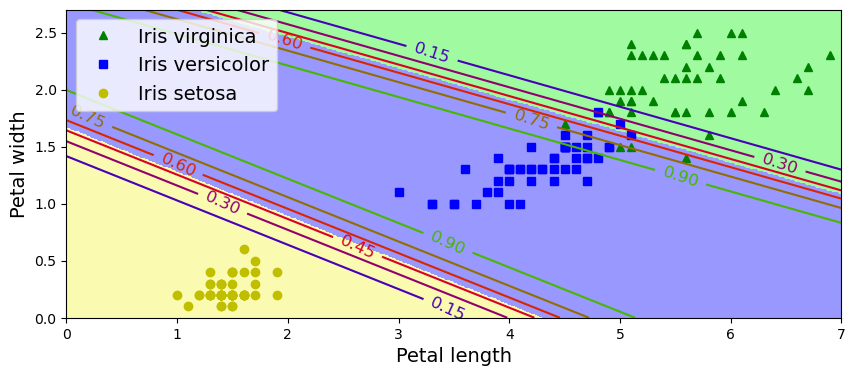

In [56]:
plot_pred(Theta)